# Variational Quantum Classifier (VQC) with Qubits for Iris Dataset

In this notebook, is the implementation of a Variational Quantum Classifier (VQC) utilizing qubits to address the Iris dataset. Leveraging the qiskit framework, I configure the VQC with the appropriate feature mapping, ansatz function, and optimizer, fine-tuning the model's parameters to achieve precise classification results. Here, the aim is to showcase the capabilities of current quantum computing techniques while also comparing the performance with proposed qutrit circuits.

In [1]:
from sklearn.datasets import load_iris
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from qiskit.algorithms.optimizers import COBYLA
from matplotlib import pyplot as plt
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
plt.style.use('ipynb')

### Iris Dataset

Each sample in the Iris dataset is characterized by four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. The goal of this classification task is to predict the species of the iris flower based on these four features. In the dataset ingestion step, we'll load the Iris dataset using scikit-learn.

In [2]:
iris_dataset = load_iris()
X = iris_dataset.data
X = MinMaxScaler().fit_transform(X)
Y = iris_dataset.target

### Encoding Features & Parametrisation

Then defining the components required to set up the VQC model. A ZZFeatureMap is used as the quantum feature map, RealAmplitudes as the ansatz function, and COBYLA as the optimizer. The feature map is constructed based on the dimensions of the input data X, and the ansatz is specified with three repetitions. 

The COBYLA optimizer is configured to have a maximum of 100 iterations. The dataset is then split into training and test sets with an 80-20 ratio using the train_test_split function, ensuring randomization with a fixed seed. These components collectively set up the VQC model and prepare the data for training and evaluation.

In [3]:
encoding = ZZFeatureMap(feature_dimension=X.shape[1], reps=1)
ansatz = RealAmplitudes(num_qubits=X.shape[1], reps=3)
optimizer = COBYLA(maxiter=100)
train_features, test_features, train_labels, test_labels = train_test_split( X, Y, train_size=0.8, random_state=42 )

### Training

In the next code cell a custom callback function `cgraph` is defined for the Variational Quantum Classifier (VQC) model. During the training process, the callback function updates and visualizes the loss values after each epoch, showing the training progress. The VQC model is constructed with a specific feature map (`encoding`), an ansatz function (`ansatz`), and an optimizer. The `fit` method is then called to train the classifier using the provided training features and labels. The total training time is printed at the end of the process. The callback function, coupled with the VQC model, allows for real-time monitoring and visualization of the loss convergence during training, providing insights into the model's learning performance.

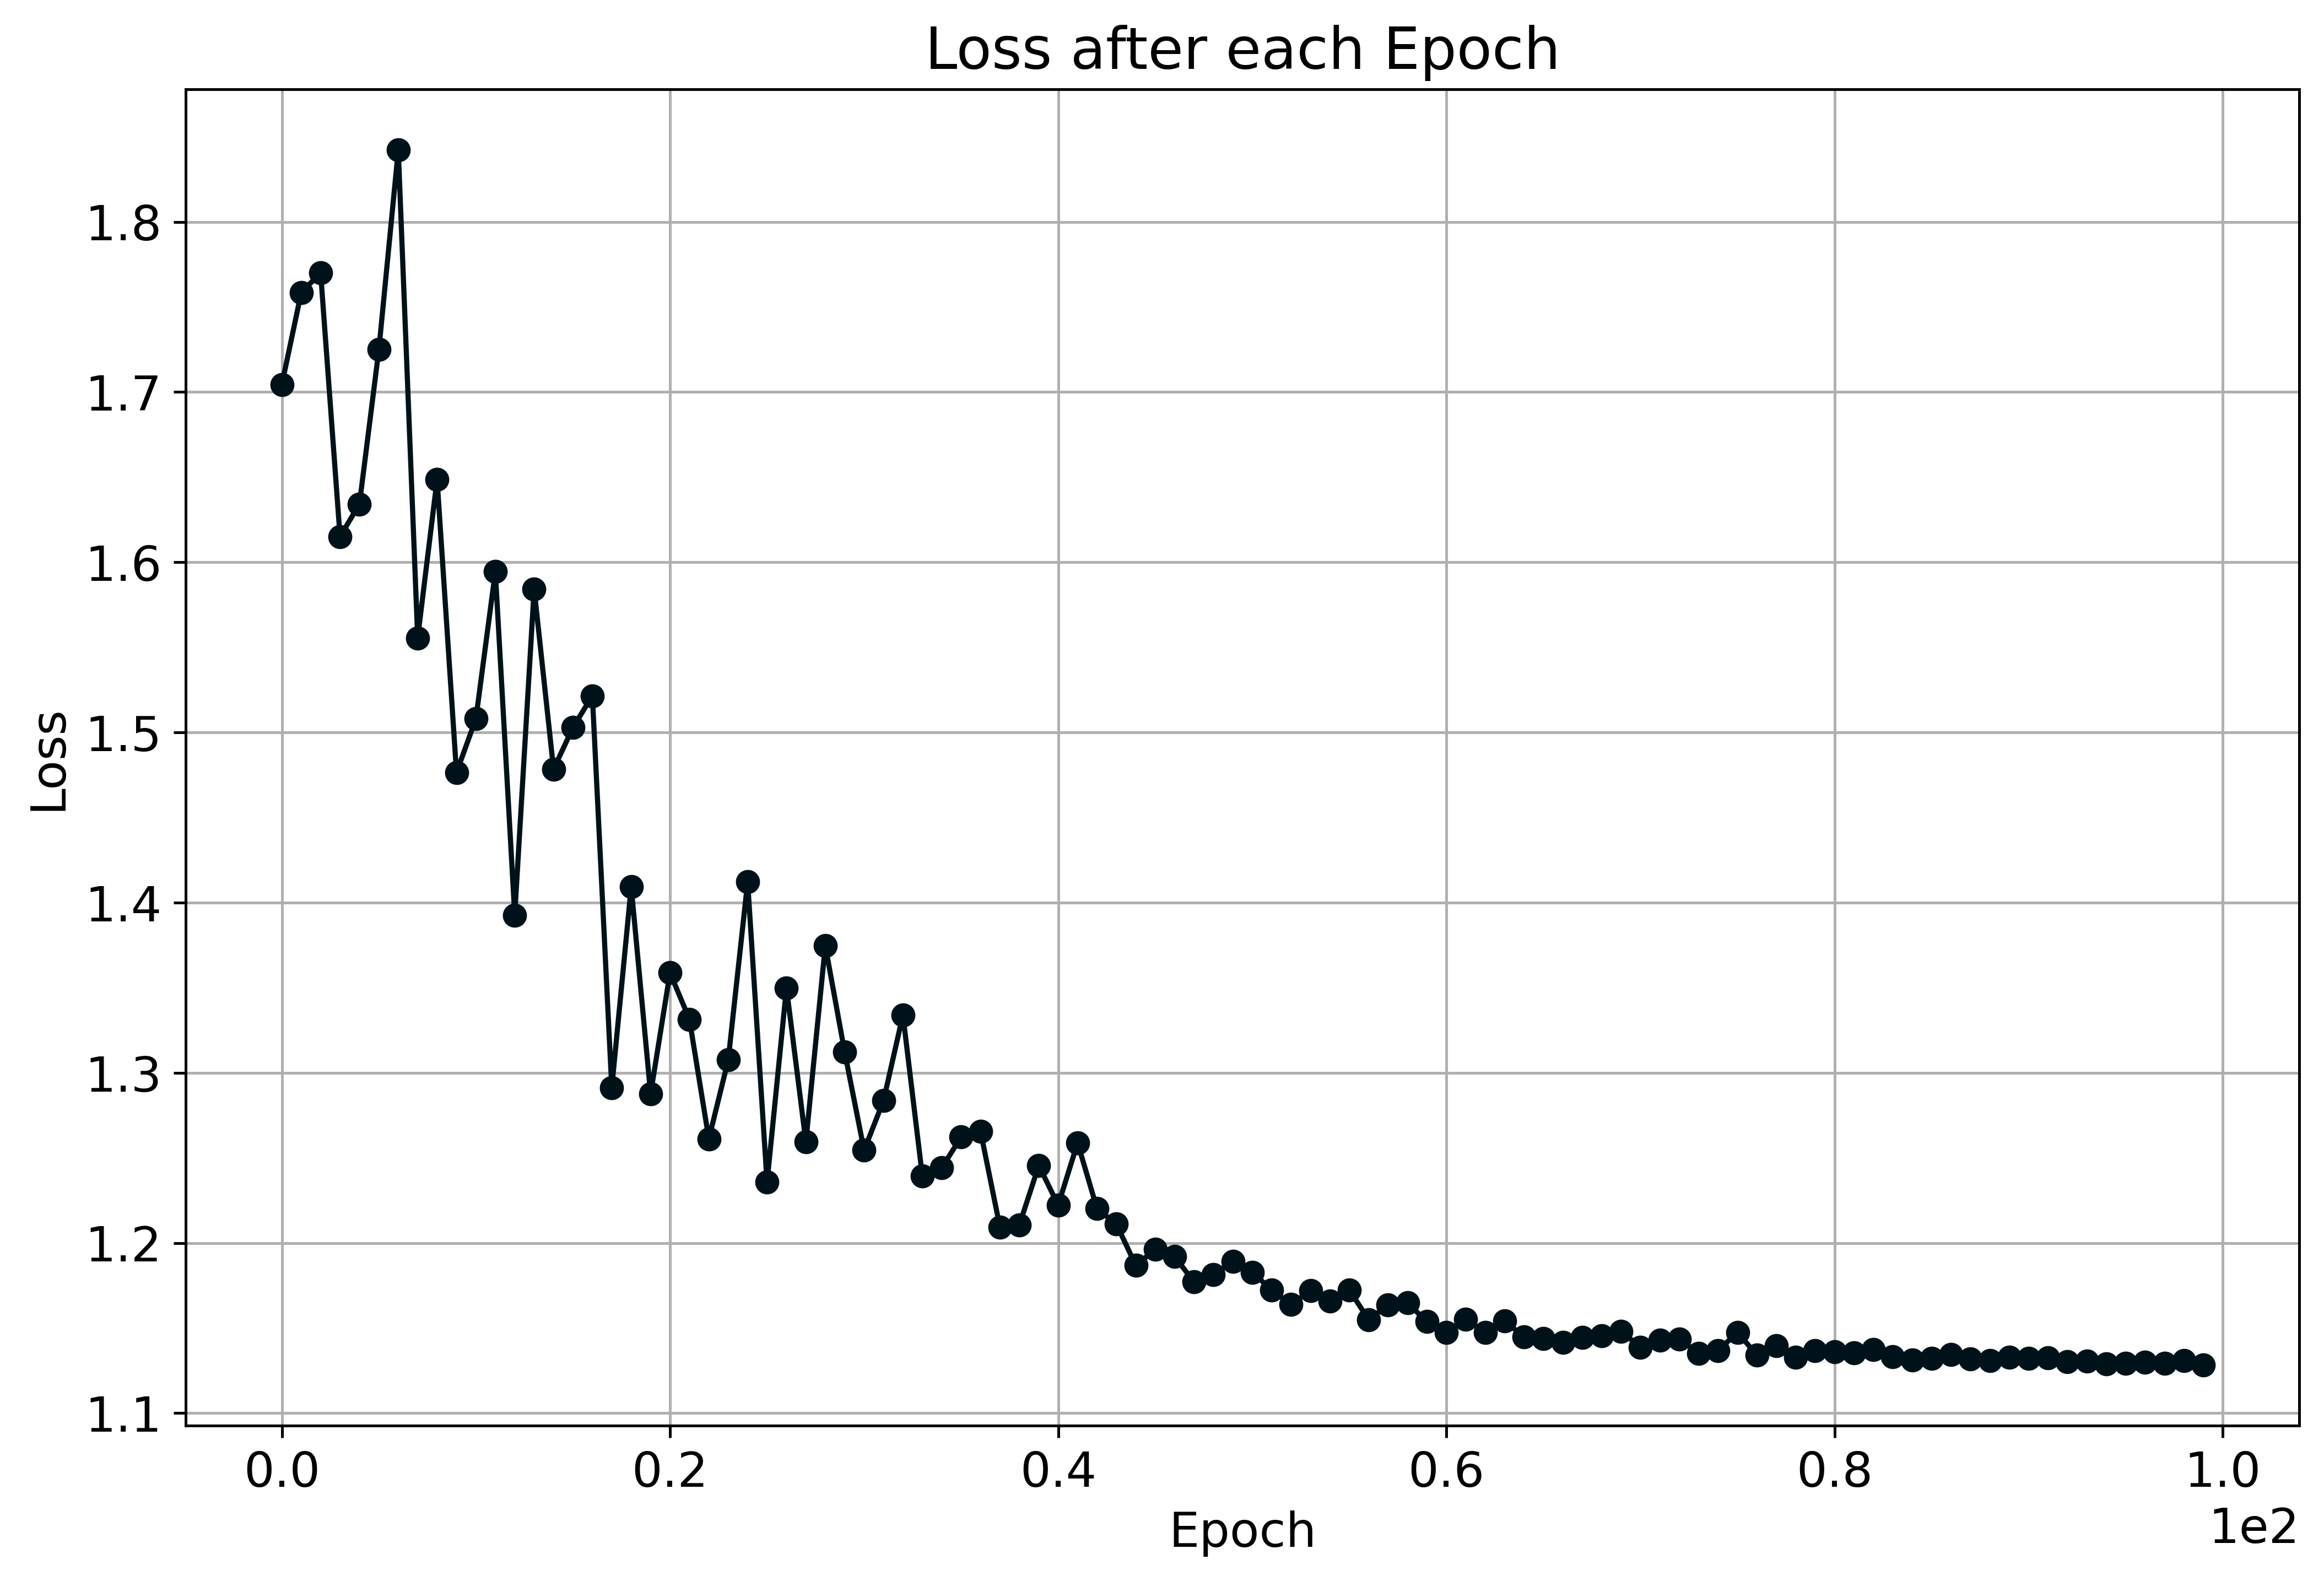

Total Training Time: 139 secs


In [4]:
losses = []
plt.rcParams["figure.figsize"] = (11, 7)
def cgraph(weights, obj_func_eval):
    clear_output(wait=True)
    losses.append(obj_func_eval)
    plt.title("Loss after each Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.plot(range(len(losses)), losses)
    plt.show()

classifier = VQC(
    feature_map=encoding,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=cgraph,
)

losses = []
start = time.time()
classifier.fit(train_features, train_labels)
total = time.time() - start
print(f"Total Training Time: {round(total)} secs")

Then printing the final weights and circuit after training.

Final weights: 
 [ 0.68230841 -0.45066776  2.61583205  1.96392869  0.00920436  0.43088595
  1.36285458  0.40672011  1.21835595  1.3280519   0.4607488   0.0518179
  1.20010795 -0.50710822  1.64985403  0.30308015]

Circuit:


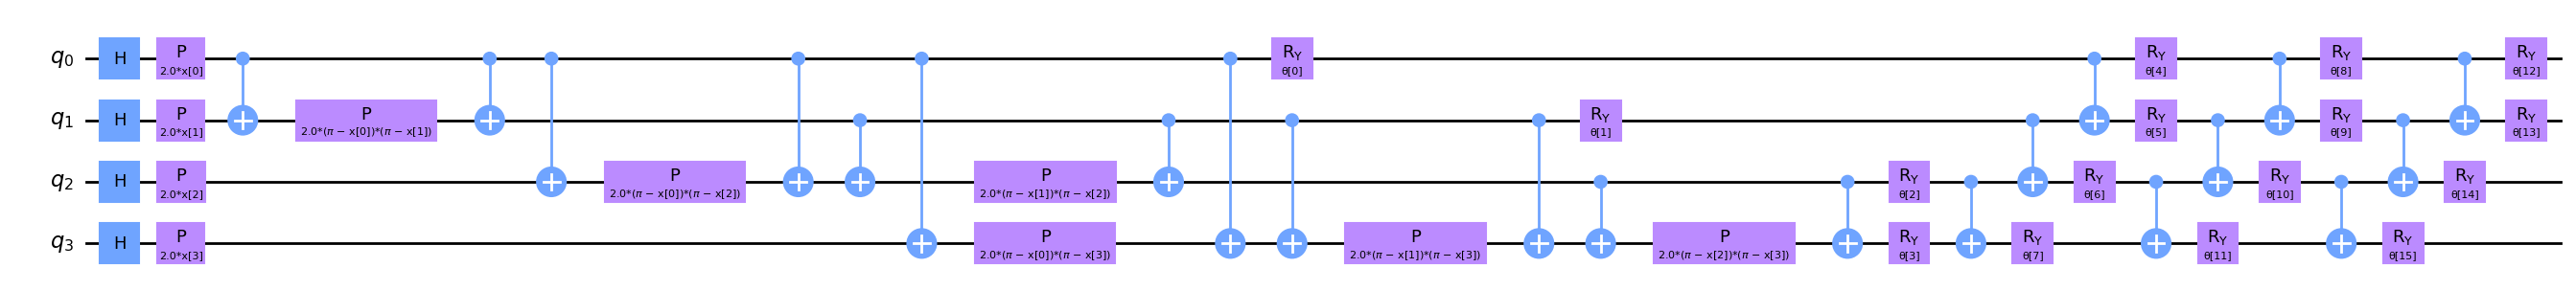

In [7]:
print("Final weights: \n", classifier.weights)
print("\nCircuit:")
classifier.circuit.decompose().draw('mpl', scale=1, fold=40)

### Evaluation

In [8]:
train_accuracy = classifier.score(train_features, train_labels)* 100
test_accuracy = classifier.score(test_features, test_labels)* 100

print(f"Train Dataset Accuracy: {train_accuracy:.2f}%")
print("________________________________")
print(f"Test Dataset Accuracy:  {test_accuracy:.2f}%")
print("________________________________")

Train Dataset Accuracy: 85.00%
________________________________
Test Dataset Accuracy:  86.67%
________________________________
